## A simple implementation of keyword searching in news titles


## 1. Data Collection 

We choose the 9news (https://www.9news.com.au/national), an Australian national news media, and try to extract the headlines from the page.

As the web page is actually written in **html**, a structured markup language, which means the information is wrapped in a regular manner.  

The part of headlines can be retrieved by **DOM** (**D**ocument **O**bject **M**odel ) tree, and we can conveniently find the path using the **Xpath Helper** extension in the Google Chrome browser. 

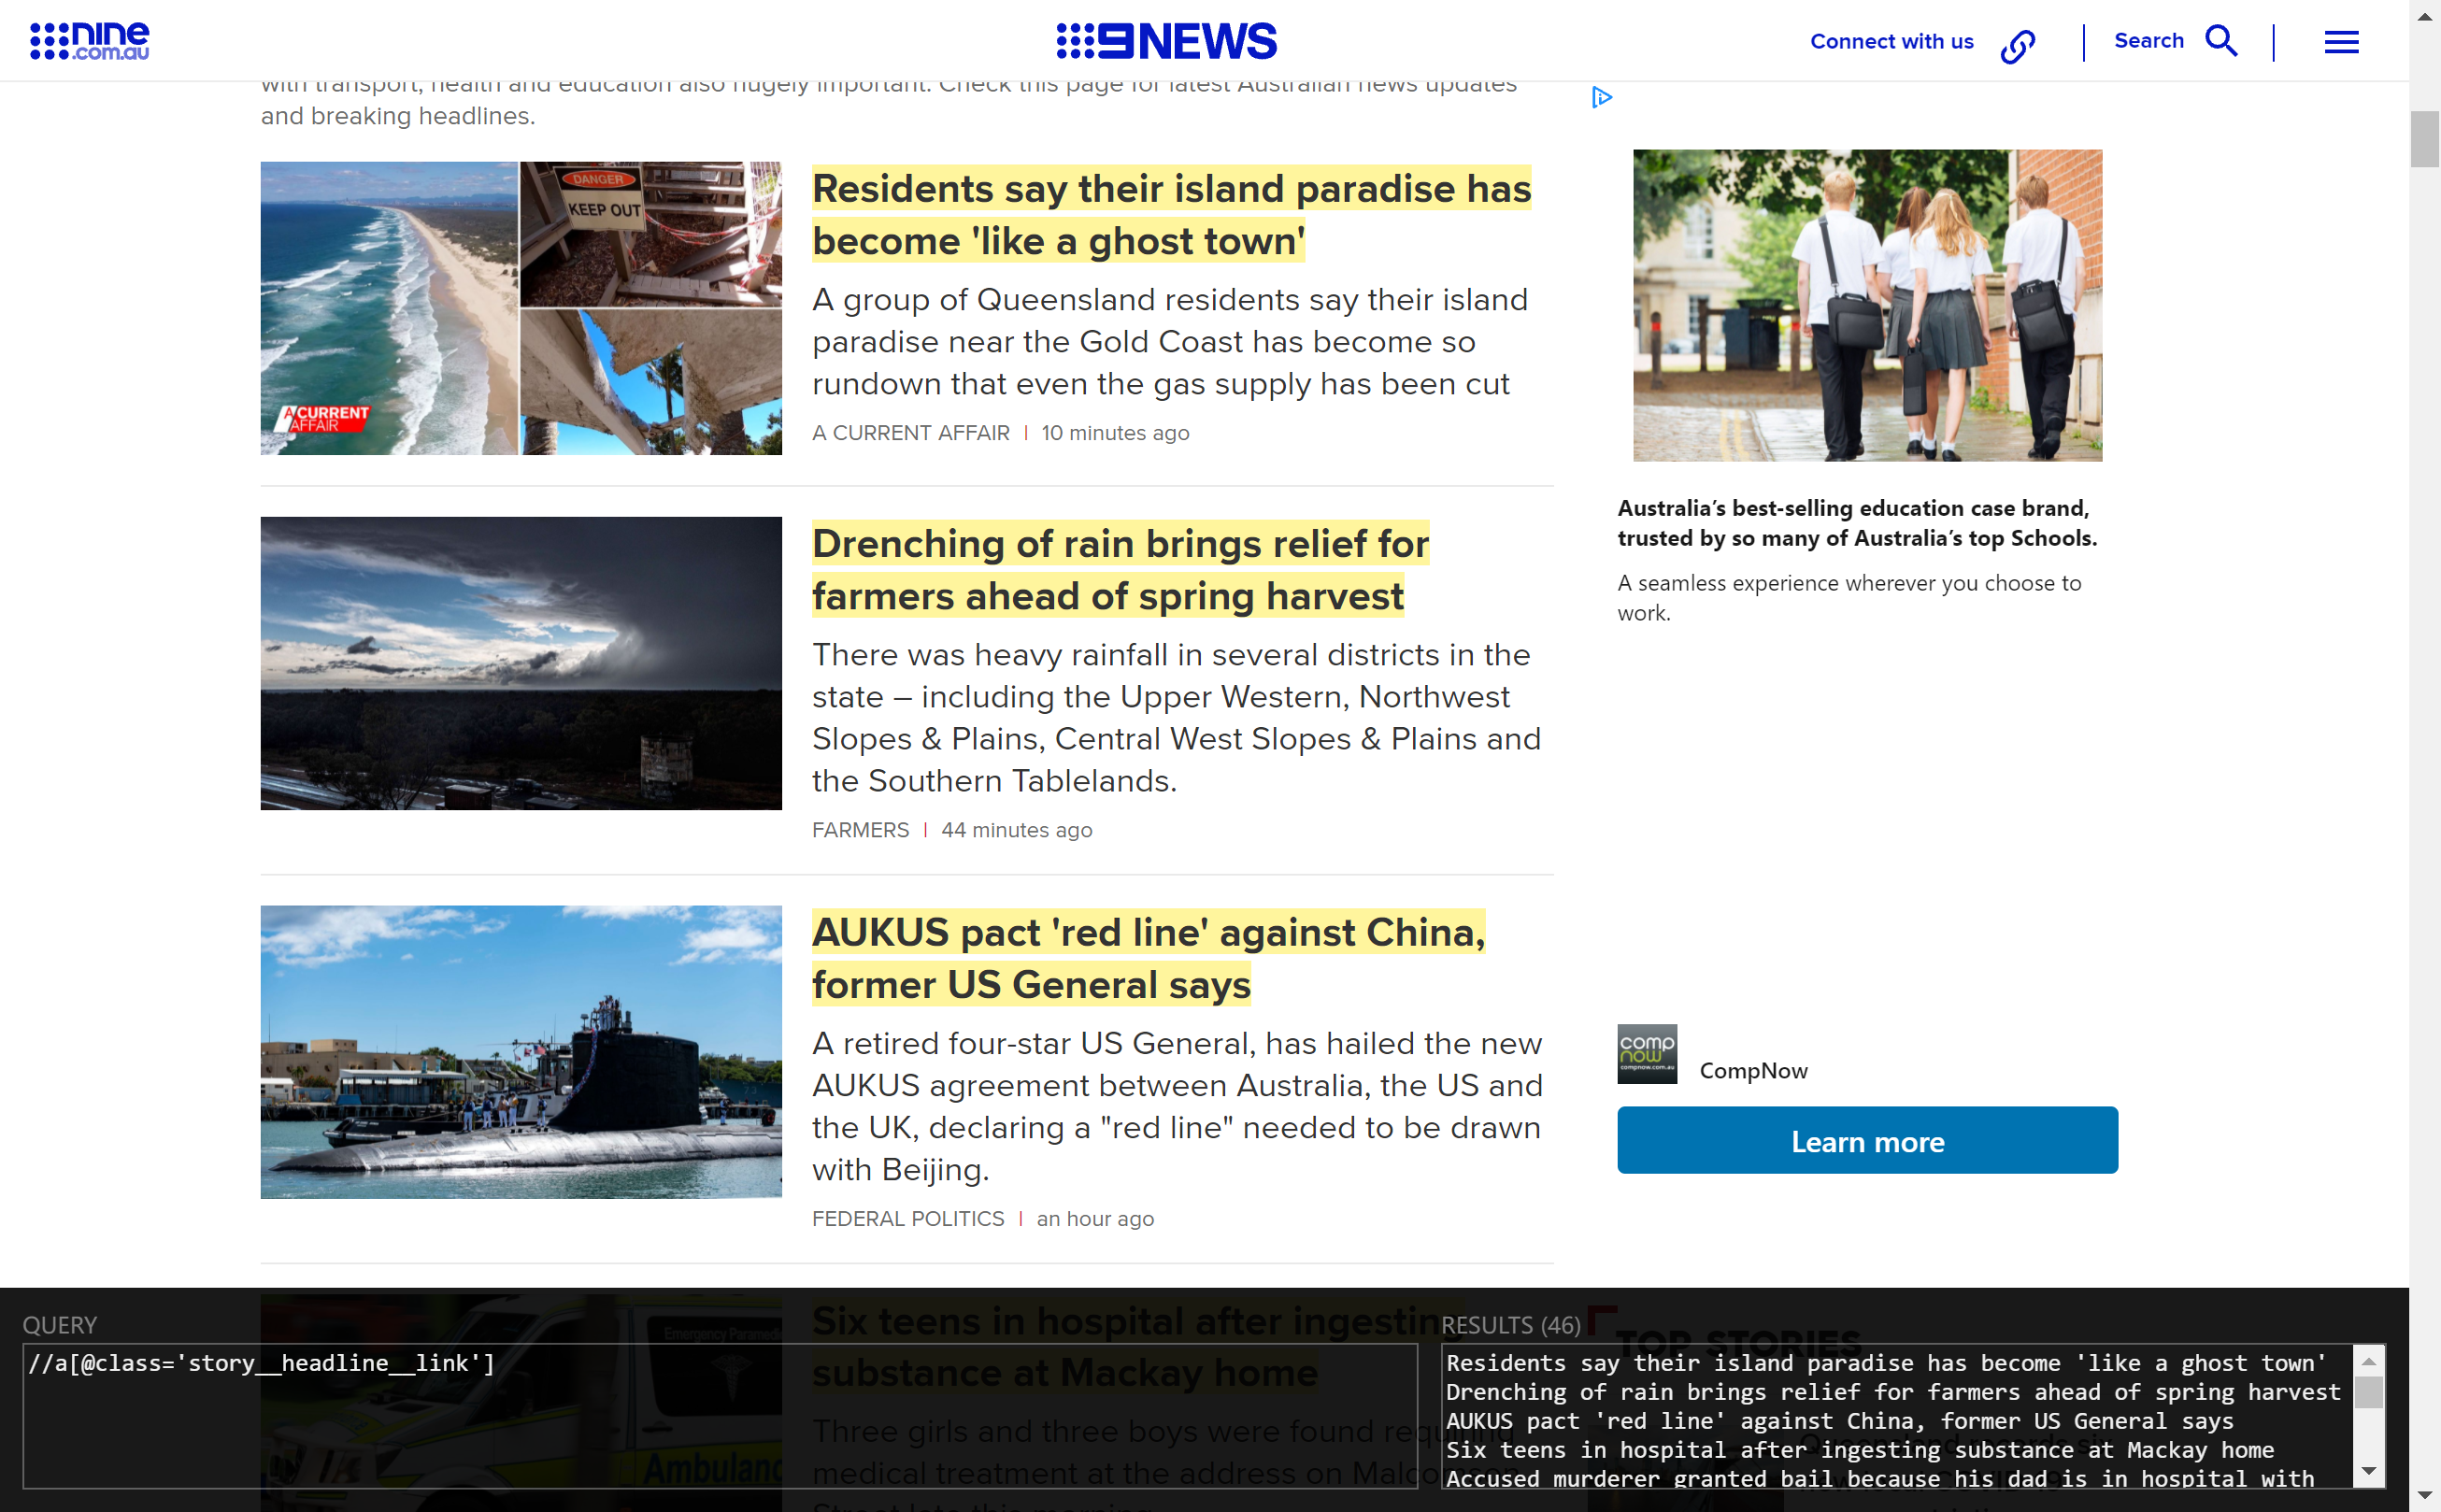

The headlines collected from the page can be then stored in a txt file.

#### Read in ```9news_headlines.txt```

In [1]:
with open("9news_headlines.txt", "r", encoding="utf-8") as f:
    title_list = f.read().split('\n')

In [2]:
 title_list[:10]

["Residents say their island paradise has become 'like a ghost town'",
 'Drenching of rain brings relief for farmers ahead of spring harvest',
 "AUKUS pact 'red line' against China, former US General says",
 'Six teens in hospital after ingesting substance at Mackay home',
 'Accused murderer granted bail because his dad is in hospital with COVID-19',
 'COVIDSafe app has so far cost over $9.1 million',
 'ACT records 31 new COVID-19 cases',
 'Mine worker killed after ground collapse in WA',
 'Explainer: Who will keep the unvaccinated out when shops open up?',
 "Oscar winner predicts star's death a week earlier"]

## 2. Keyword Searching with Python

#### Filtering titles with ```in```

In [3]:
keyword = "COVID-19"
result_idx = []

In [4]:
for idx, title in enumerate(title_list):
    if keyword.lower() in title.lower():
        result_idx.append(idx)

In [5]:
result_idx

[4, 6, 18, 20, 23, 28, 30, 35, 40, 44, 45]

#### Adding numerical order for better presentation

In [6]:
index=1
for i in result_idx:
    print(f'{index}. {title_list[i]}')
    index+=1

1. Accused murderer granted bail because his dad is in hospital with COVID-19
2. ACT records 31 new COVID-19 cases
3. NSW records 941 new COVID-19 cases as Premier warns 'we can't stuff it up'
4. Queensland records six new local COVID-19 cases, restrictions extended
5. How experts have reacted to Victoria's 'disturbing' COVID-19 surge
6. Coles calls for COVID-19 isolation rules to ease
7. How COVID-19 has impacted cancer diagnosis, treatment
8. South Sydney Rabbitohs fans caring for those impacted by COVID-19
9. Calls for COVID-19 vaccine to be mandated among Victorian disability workers
10. CFMEU office declared COVID-19 exposure site after four staff test positive
11. Victoria's health care system working at slowest rate ever because of COVID-19


#### Adding highlights with ```HTML``` in ```IPython.core.display```

In [7]:
from IPython.core.display import display, HTML

def highlight(text:str, keyword:str):
    result = text
    k_index = text.lower().find(keyword.lower())
    if k_index >=0:
        origin_kword = text[k_index:k_index+ len(keyword)]
        result = text.replace(origin_kword, f'<span style="color:red"> {origin_kword} </span>')
    return result

index=1
for i in result_idx:
    display(HTML(f'{index}. {highlight(title_list[i], keyword)}'))
    index+=1

#### Adding score for hit counting, and rank by this order

In [8]:
def score(text, keyword):
    count = text.lower().count(keyword.lower())
    return count

result_score = []
for i in result_idx:
    pair = (i, score(title_list[i], keyword))
    result_score.append(pair)

sorted(result_score, key=lambda x: x[1], reverse=True)

[(4, 1),
 (6, 1),
 (18, 1),
 (20, 1),
 (23, 1),
 (28, 1),
 (30, 1),
 (35, 1),
 (40, 1),
 (44, 1),
 (45, 1)]

In [9]:
index=1
for i_score in result_score:
    display(HTML(f'{index}. {highlight(title_list[i_score[0]], keyword)}'))
    index+=1

####  Encapsulated into fuctions

In [10]:
from IPython.core.display import display, HTML

def search(text_list:list, keyword:str):
    """return a list of sorted news title index"""
    result_score=[]
    for idx, title in enumerate(text_list):
        if keyword.lower() in title.lower():
            result_score.append((idx, score(title, keyword)))
    result_score = sorted(result_score, key=lambda x:x[1], reverse=True)
    sorted_result= [idx for idx,_ in result_score]
    return sorted_result

def render(result_score:list, text_list:list, keyword:str):
    """print the highlighted result in html"""
    index=1
    for sorted_idx in result_score:
        display(HTML(f'{index}. {highlight(text_list[sorted_idx], keyword)}'))
        index+=1

def highlight(text:str, keyword:str):
    """highlight the keywords in each hited title"""
    hl_result = text
    k_index = text.lower().find(keyword.lower())
    if k_index >=0:
        origin_kword = text[k_index:k_index+ len(keyword)]
        hl_result = text.replace(origin_kword, f'<span style="color:red"> {origin_kword} </span>')
    return hl_result

def score(text:str, keyword:str):
    """count keywords in each title"""
    count = text.lower().count(keyword.lower())
    return count
    

In [11]:
with open("9news_headlines.txt", "r", encoding="utf-8") as f:
    title_list = f.read().split('\n')
keyword = 'Covid-19'
sorted_result = search(title_list, keyword)
render(sorted_result, title_list, keyword)

#### Encapsulated into a Class

In [12]:
from IPython.core.display import display, HTML

class MySearchV0():
    def __init__(self, filename:str, keyword:str):
        self.text_list = []
        self.keyword = keyword
        self.load_data(filename)
    
    def load_data(self, filename:str):
        with open(filename, "r", encoding="utf-8") as f:
            self.text_list = f.read().split('\n')
    
    def search(self):
        """return a list of sorted news title index"""
        result_score=[]
        for idx, title in enumerate(self.text_list):
            if keyword.lower() in title.lower():
                result_score.append((idx, self.score(title, self.keyword)))
        result_score = sorted(result_score, key=lambda x:x[1], reverse=True)
        sorted_result= [idx for idx,_ in result_score]
        return sorted_result

    def render(self, result_score:list):
        """print the highlighted result in html"""
        index=1
        for sorted_idx in result_score:
            display(HTML(f'{index}. {self.highlight(self.text_list[sorted_idx], self.keyword)}'))
            index+=1

    def highlight(self, text:str, keyword:str):
        """highlight the keywords in each hited title"""
        hl_result = text
        k_index = text.lower().find(self.keyword.lower())
        if k_index >=0:
            origin_kword = text[k_index:k_index+ len(self.keyword)]
            hl_result = text.replace(origin_kword, f'<span style="color:red"> {origin_kword} </span>')
        return hl_result

    def score(self, text:str, keyword:str):
        """count keywords in each title"""
        count = text.lower().count(self.keyword.lower())
        return count
        

In [13]:
keyword = "Queensland"
searcher = MySearchV0("9news_headlines.txt", keyword)
result = searcher.search()
searcher.render(result)